## The van der Waals interaction

Previously, you were given the opportunity to observe particles that interact only through the van der Waals interaction. 
In order to achieve this it is necessary to have a **potential model**, a mathematical function, that is capable of modeling such an interaction. 
It is known that the van der Waals interaction encompasses **two** forces; the first is the long-range attractive London dispersion and the second is the short-range Pauli exclusion principle.
Therefore, or potential model must be able to model both of these aspects. 

One mathematical function that is commonly applied is the **Lennard-Jones** potential model [[1](#references)], which considers the attractve London dispersion forces as follows, 

$$ E_{\text{attractive}}(r) = -4\varepsilon\Big(\dfrac{\sigma}{r}\Big)^6\;,$$ 

where $\sigma$ is the distance at which the potential energy between the two particles is zero, $-\varepsilon$ is the potential energy at the equilbrium separation, and $r$ is the distance between the two atoms. 
The Pauli exclusion principle is repulsive and only present over very short distances modelled as, 

$$ E_{\text{repulsive}}(r) = 4\varepsilon\Big(\dfrac{\sigma}{r}\Big)^{12}\;,$$

The Python code below defines each of the components of the Lennard-Jones potential and the total energy of the interaction.
These are then all plotted on a single graph. 
The values of $\sigma$ and $\varepsilon$ are those associated with an argon-argon interaction, as defined by Rahman [[2](#references)].

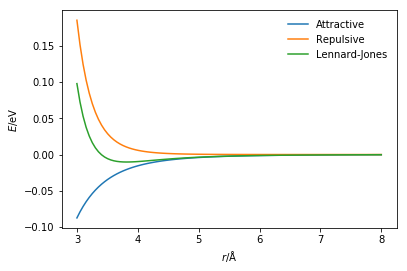

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def attractive_energy(r, epsilon, sigma):
    """
    Attractive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of attractive component of Lennard-Jones 
        interaction
    """
    return -4 * epsilon * np.power(sigma / r, 6)

def repulsive_energy(r, epsilon, sigma):
    """
    Repulsive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of repulsive component of Lennard-Jones 
        interaction
    """
    return 4 * epsilon * np.power(sigma / r, 12)

def lj_energy(r, epsilon, sigma):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    epsilon: float 
        Potential energy at the equilibrium bond length (eV)
    sigma: float 
        Distance at which the potential energy is zero (Å)
    
    Returns
    -------
    float
        Energy of the van der Waals interaction
    """
    return repulsive_energy(r, epsilon, sigma) + attractive_energy(r, epsilon, sigma)

r = np.linspace(3, 8, 100)
plt.plot(r, attractive_energy(r, 0.0103, 3.4), label='Attractive')
plt.plot(r, repulsive_energy(r, 0.0103, 3.4), label='Repulsive')
plt.plot(r, lj_energy(r, 0.0103, 3.4), label='Lennard-Jones')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.legend(frameon=False)
plt.show()

The Lennard-Jones potential is not the only way to model the van der Waals interaction. 
Another commonly applied potential model is the **Buckingham** potential [[3](#references)].
Similar to the Lennard-Jones potential, the Buckingham models the attractive term with a sixth power dependency on the distance between the two bonded particles. 
However, instead of a twelfth power repulsion term an exponential function is utilised instead. 
The total Buckingham potential has the following form, 

$$ E_{\text{Buckingham}}(r) = A\exp{(-Br)} - \dfrac{C}{r^6}, $$

where $A$, $B$, and $C$ are interaction specific parameters that must be determined. 

The Python code below allows the comparison between these two van der Waals potentials, using defined parameters for an argon-argon interaction [[2,3](#references)].

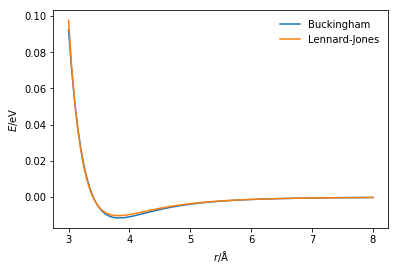

In [17]:
def buckingham_energy(rij, a, b, c):
    """
    Implementation of the Buckingham potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    r: float
        Distance between two particles (Å)
    a: float 
        A parameter for the interaction (eV)
    b: float 
        B parameter for the interaction (eV)
    c: float 
        C parameter for the interaction (eV)
        
    Returns
    -------
    float
        Energy of the van der Waals interaction
    """
    return a * np.exp(-b * r) - c / np.power(r, 6)

r = np.linspace(3, 8, 100)
plt.plot(r, buckingham_energy(r, 10549.313, 3.66, 63.670), label='Buckingham')
plt.plot(r, lj_energy(r, 0.0103, 3.4), label='Lennard-Jones')
plt.xlabel(r'$r$/Å')
plt.ylabel(r'$E$/eV')
plt.legend(frameon=False)
plt.show()

There is a small but clear difference between the two potential energy functions; this may be due to the different potential model or due to the [parameterisation](http://pythoninchemistry.org/sim_and_scat/parameterisation/intro) of that model.

## Important

These are just two of many potentials for modelling of the van der Waals interaction. Furthermore, the parameters used in the model are just one example of the many possible parameterisations of the argon-argon interaction. 

## References

1. Lennard-Jones, J. E. *Proc. Royal Soc. Lond. A.* 1924, **106** (738), 463–477. [10.1098/rspa.1924.0082](https://doi.org/10.1098/rspa.1924.0082).
2. Rahman, A. *Phys. Rev.* 1964, **136** (2A), A405–A411. [10.1103/PhysRev.136.A405](https://doi.org/10.1103/PhysRev.136.A405).
3. Buckingham, R. A. *Proc. Royal Soc. Lond. A.* 1938, **168** (933), 264–283. [10.1098/rspa.1938.0173](https://doi.org/10.1098/rspa.1938.0173).